In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import bisect

quantization_no_gs_1bits scale 1
min
0 l2 1.49484 op 9 ap 5
1 l2 2.61345 op 1 ap 7
2 l2 2.62597 op 1 ap 7
avg 3.86068 at 45
43 l2 3.82801 op 5 ap 9
44 l2 3.895 op 0 ap 2
45 l2 3.89626 op 9 ap 4


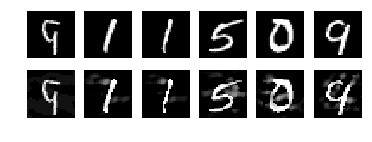

median3x3 scale 4
min
0 l2 0.236197 op 4 ap 9
1 l2 0.241416 op 9 ap 5
2 l2 0.282856 op 9 ap 4
avg 1.29427 at 53
51 l2 1.27371 op 4 ap 6
52 l2 1.30628 op 1 ap 6
53 l2 1.31776 op 4 ap 9


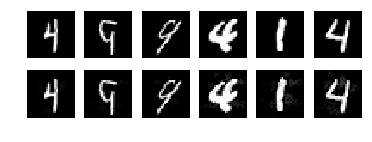

detection_2x2_1bits scale 1
min
0 l2 2.00067 op 1 ap 4
1 l2 2.04021 op 9 ap 8
2 l2 2.39379 op 3 ap 5
avg 4.7589 at 44
42 l2 4.65534 op 7 ap 0
43 l2 4.76662 op 6 ap 7
44 l2 4.78593 op 6 ap 2


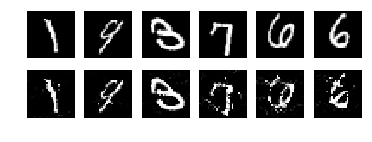

In [5]:
orig_imgs = np.load('results/unquantized_images.npy')

def l2d(x, y):
    return np.sqrt(np.sum(np.square(x - y)))
raw = matplotlib.colors.Normalize(-1., 1.)
#gs = gridspec.GridSpec(3, 5)
gs = gridspec.GridSpec(2, 6)

experiments = [
    ('quantization_no_gs_1bits', 1), # quantization_no_gs_1bits
    ('median3x3', 4),
    ('detection_2x2_1bits', 1),
]
for exp, scale in experiments:
    print exp, 'scale', scale
    adv_imgs = np.load('results/%s/adversarial_images.npy' % exp)
    ground_truth = np.argmax(np.load('results/%s/ground_truth_labels.npy' % exp), 1)
    orig_pred = np.load('results/%s/nonadversarial_predictions.npy' % exp)
    adv_pred = np.load('results/%s/adversarial_predictions.npy' % exp)
    d = zip(orig_imgs, adv_imgs, ground_truth, orig_pred, adv_pred)
    sd = sorted((l2d(oi, ai), oi, ai, op, ap) for oi, ai, gt, op, ap in d if op == gt and ap != gt)
    print 'min'
    plt.figure(figsize=(6, 2))
    for i in range(3):
        l2, oi, ai, op, ap = sd[i]
        print i, 'l2', l2, 'op', op, 'ap', ap
        plt.subplot(gs[0, i])
        plt.imshow(oi[:, :, 0], cmap='gray')
        plt.axis('off')
        plt.subplot(gs[1, i])
        plt.imshow(ai[:, :, 0], cmap='gray')
        plt.axis('off')
        # plt.subplot(gs[2, i])
        # plt.imshow(((ai - oi) * scale)[:, :, 0], norm=raw, cmap='RdBu')
        # plt.axis('off')
    avg = np.average([l2 for l2, oi, ai, op, ap in sd])
    idx = bisect.bisect_left(sd, (avg, None, None, 0, 0))
    print 'avg', avg, 'at', idx
    for i in range(3):
        l2, oi, ai, op, ap = sd[i + idx - 1]
        print i + idx - 2, 'l2', l2, 'op', op, 'ap', ap
        plt.subplot(gs[0, i + 3])
        plt.imshow(oi[:, :, 0], cmap='gray')
        plt.axis('off')
        plt.subplot(gs[1, i + 3])
        plt.imshow(ai[:, :, 0], cmap='gray')
        plt.axis('off')
        # plt.subplot(gs[2, i + 3])
        # plt.imshow(((ai - oi) * scale)[:, :, 0], norm=raw, cmap='RdBu')
        # plt.axis('off')
    plt.show()